### Importing the required libraries to get started with our data

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [134]:
df=pd.read_csv('train_ctrUa4K.csv')

In [135]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [137]:
df.drop(['Loan_ID'],inplace=True , axis=1)

In [138]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### The null values are not too much , so we'll drop them.

In [139]:
df.dropna(inplace=True)

In [140]:
df.reset_index(drop = True , inplace = True)

In [141]:
df.duplicated().sum()

0

### Checking for duplicates is an important step . There's no duplicates. 

In [142]:
for col in df.columns :
    print(col,df[col].unique())

Gender ['Male' 'Female']
Married ['Yes' 'No']
Dependents ['1' '0' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
ApplicantIncome [ 4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  3073  1853
  1299  4950  3510  4887  7660  5955  2600  9560  2799  4226  1442  3167
  4692  3500 12500  3667  4166  3748  3600  1800  3941  5649  5821  2645
  4000  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  2500
  3029  2609  5726 10750  7100  4300  3208  1875  5266  3750  1000  3846
  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  2484  1977
  4188  1759  4288  4843  3052 11417  3800  2071  5316 14583  5568 10408
  2137  2957 10513  2014  2718  3459  4895  3316 14999  4200  5042  6950
  2698 11757  2330 14866  1538 10000  4860  6277  2577  9166  2281  3254
 39999  9538  1863  7933  3089  4167  9323  2439  2237  8000  3522  5708
  4344  3497  2045  5516  6400  4600 33846  3625 39147  2178  9328  4885
 12000  6033  3858  4191  3125  8333 110

In [143]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

In [144]:
df['Credit_History']=df['Credit_History'].astype('int')

In [145]:
df['Gender'].value_counts()

Gender
Male      394
Female     86
Name: count, dtype: int64

In [146]:
df['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [147]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [148]:
df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [149]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [150]:
df['Loan_Amount_Term'].unique()

array([360, 120, 180,  60, 300, 480, 240,  36,  84])

In [151]:
df['Credit_History'].value_counts()

Credit_History
1    410
0     70
Name: count, dtype: int64

In [152]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [153]:
df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [154]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [155]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### Visualizing the data and checking for the outliers.

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

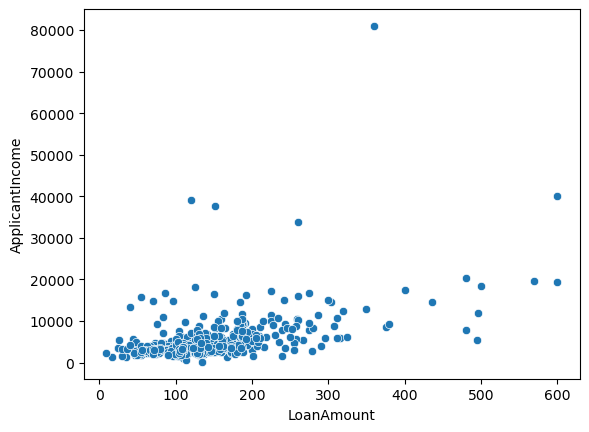

In [156]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=df)

<Axes: xlabel='ApplicantIncome'>

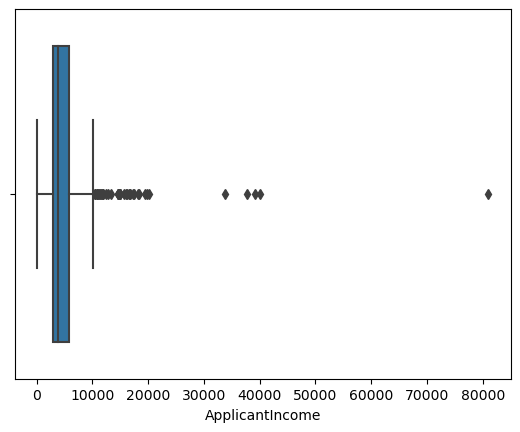

In [157]:
sns.boxplot(x='ApplicantIncome',data=df)

### As it's obvious , there's outliers in the "ApplicantIncome" column . so , we'll deal with these outliers with all the numerical columns.

In [158]:
df[df['ApplicantIncome']>20000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
120,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180,0,Semiurban,Y
142,Male,Yes,1,Graduate,No,33846,0.0,260.0,360,1,Semiurban,N
144,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360,1,Semiurban,Y
244,Male,No,0,Graduate,No,20233,0.0,480.0,360,1,Rural,N
319,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360,0,Rural,N
347,Male,No,1,Graduate,No,37719,0.0,152.0,360,1,Semiurban,Y


In [159]:
df=df[~(df['ApplicantIncome']>20000)]

<Axes: xlabel='ApplicantIncome'>

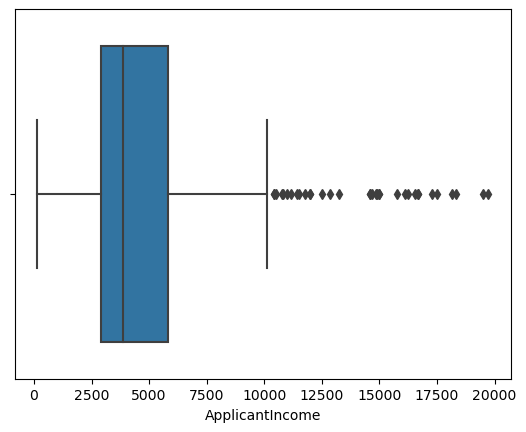

In [160]:
sns.boxplot(x='ApplicantIncome',data=df)

<Axes: xlabel='CoapplicantIncome'>

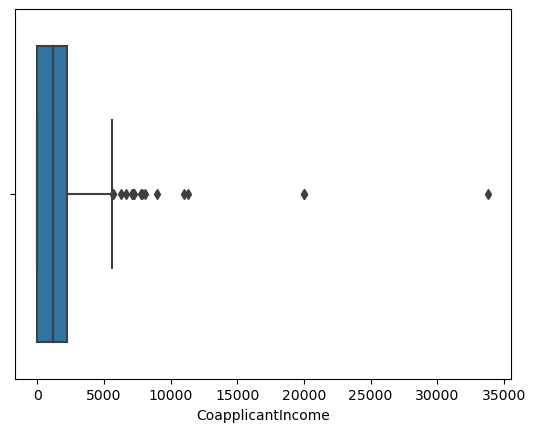

In [161]:
sns.boxplot(x='CoapplicantIncome',data=df)

In [162]:
df[df['CoapplicantIncome']>=10000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
8,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360,1,Semiurban,N
137,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360,0,Semiurban,N
312,Male,No,0,Graduate,No,2500,20000.0,103.0,360,1,Semiurban,Y
326,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360,1,Urban,N
454,Male,No,0,Graduate,No,1836,33837.0,90.0,360,1,Urban,N


In [163]:
df=df[~(df['CoapplicantIncome']>=10000)]

<Axes: xlabel='CoapplicantIncome'>

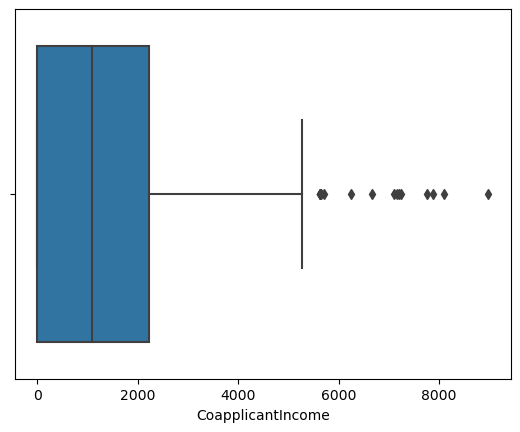

In [164]:
sns.boxplot(x='CoapplicantIncome',data=df)

<Axes: xlabel='LoanAmount'>

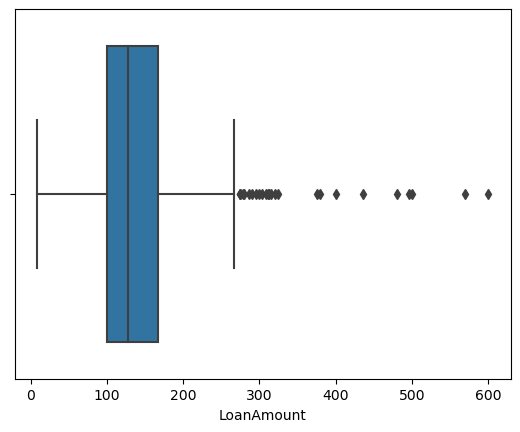

In [165]:
sns.boxplot(x='LoanAmount',data=df)

In [166]:
df[df['LoanAmount']>=300]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360,1,Urban,Y
26,Male,No,3+,Graduate,No,12500,3000.0,320.0,360,1,Rural,N
53,Male,Yes,1,Graduate,No,10750,0.0,312.0,360,1,Urban,Y
203,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360,1,Rural,N
220,Male,Yes,0,Graduate,No,14583,0.0,436.0,360,1,Semiurban,Y
253,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360,1,Rural,Y
254,Male,Yes,1,Graduate,Yes,8666,4983.0,376.0,360,0,Rural,N
271,Male,No,0,Graduate,No,8750,4167.0,308.0,360,1,Rural,N
286,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360,1,Rural,N
289,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300,1,Rural,Y


In [167]:
df=df[~(df['LoanAmount']>=300)]

<Axes: xlabel='LoanAmount'>

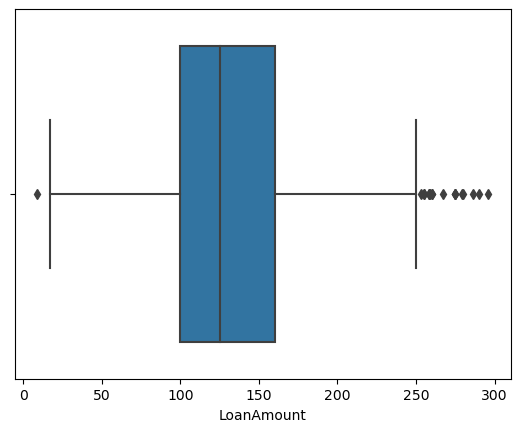

In [168]:
sns.boxplot(x='LoanAmount',data=df)

In [169]:
df.duplicated().sum()

0

In [170]:
df['Loan_Amount_Term'].max()

480

In [171]:
df['Loan_Amount_Term'].unique()

array([360, 120, 180,  60, 300, 480, 240,  36,  84])

In [172]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360    385
180     35
480     12
300      8
120      3
84       3
60       2
240      2
36       2
Name: count, dtype: int64

In [173]:
replacements={120:300,240:300,84:300,60:300,36:300}
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].map(replacements).fillna(df['Loan_Amount_Term'])

In [174]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    385
180.0     35
300.0     20
480.0     12
Name: count, dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 479
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             452 non-null    object 
 1   Married            452 non-null    object 
 2   Dependents         452 non-null    object 
 3   Education          452 non-null    object 
 4   Self_Employed      452 non-null    object 
 5   ApplicantIncome    452 non-null    int64  
 6   CoapplicantIncome  452 non-null    float64
 7   LoanAmount         452 non-null    float64
 8   Loan_Amount_Term   452 non-null    float64
 9   Credit_History     452 non-null    int32  
 10  Property_Area      452 non-null    object 
 11  Loan_Status        452 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 44.1+ KB


In [176]:
df['Credit_History']=df['Credit_History'].astype('object')

In [177]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Creating the pipeline and build our model

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [179]:
Encoder=ColumnTransformer(transformers = [('OHE',OneHotEncoder(sparse_output=False,drop="first"),['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area'])
                                         ],remainder='passthrough')

In [180]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , StandardScaler()))
steps.append(("LR" , LogisticRegression()))
pipeline = Pipeline(steps = steps)

In [181]:
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

In [182]:
result = cross_validate(pipeline , x ,y , cv = 5 , scoring="accuracy" , return_train_score=True)

In [183]:
result["train_score"].mean()

0.8213587181096097

In [184]:
result["test_score"].mean()

0.8164346764346764

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [186]:
models = []
models.append(("LR" , LogisticRegression()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(("SVC" , SVC()))
models.append(("GNB" , GaussianNB()))
models.append(("XGB" , GradientBoostingClassifier()))

In [187]:
for model in models:
    steps = []
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , StandardScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    result = cross_validate(pipeline ,x , y, cv = 5 , scoring = "accuracy" , return_train_score=True)
    print(f"{model[0]} Average Train accuracy is {result['train_score'].mean() }")
    print(f"{model[0]} Average Test accuracy is {result['test_score'].mean() } \n")


LR Average Train accuracy is 0.8213587181096097
LR Average Test accuracy is 0.8164346764346764 

CART Average Train accuracy is 1.0
CART Average Test accuracy is 0.7058119658119658 

RF Average Train accuracy is 1.0
RF Average Test accuracy is 0.8097680097680098 

KNN Average Train accuracy is 0.820238441407386
KNN Average Test accuracy is 0.7789010989010988 

SVC Average Train accuracy is 0.8373915305856965
SVC Average Test accuracy is 0.8208547008547008 

GNB Average Train accuracy is 0.8196966682481136
GNB Average Test accuracy is 0.8097680097680098 

XGB Average Train accuracy is 0.928651229702637
XGB Average Test accuracy is 0.7855189255189254 



### The best accuracy with Support Vecror Classifier model , so this will be used. 